Telecom Churn Case Study:

Business Problem:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.Retaining high profitable customers is the number one business goal.

Steps involved ⁉

1. Reading , understanding and visulaizing the data.
2. Preparing the data for modelling
3. Building the model
5. Evalutation of the model
6. Choose the best possible model

In [194]:
## importing all the necessary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)


## Reading the data

In [195]:
df_churn = pd.read_csv("/content/drive/MyDrive/DataScience/telecom_churn_data.csv")

In [196]:
df_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [197]:
## Get the features summary
df_churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [198]:
## Get the shape 
df_churn.shape

(99999, 226)

In [199]:
df_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [200]:
df_missing = df_churn.isnull().sum()/len(df_churn.index)*100
df_missing.sort_values(ascending=False)

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

In [201]:
## list of columns having more than 30 % of missing values
missing_columns = df_missing.index[df_missing > 30].tolist()


In [202]:
## Delete columns that has more 30% null values
df_churn = df_churn.drop(missing_columns,axis=1)

In [203]:
# shape after removing the null values columns
df_churn.shape

(99999, 186)

In [204]:
(df_churn.isnull().sum()/len(df_churn.index)*100).sort_values(ascending=False)

loc_og_t2m_mou_9        7.745077
loc_ic_t2m_mou_9        7.745077
offnet_mou_9            7.745077
std_ic_t2f_mou_9        7.745077
roam_ic_mou_9           7.745077
std_og_t2t_mou_9        7.745077
roam_og_mou_9           7.745077
std_ic_t2m_mou_9        7.745077
loc_og_t2t_mou_9        7.745077
std_ic_t2o_mou_9        7.745077
loc_og_mou_9            7.745077
std_ic_t2t_mou_9        7.745077
isd_og_mou_9            7.745077
loc_ic_t2f_mou_9        7.745077
loc_og_t2c_mou_9        7.745077
loc_og_t2f_mou_9        7.745077
loc_ic_t2t_mou_9        7.745077
std_og_t2m_mou_9        7.745077
spl_ic_mou_9            7.745077
std_ic_mou_9            7.745077
ic_others_9             7.745077
std_og_mou_9            7.745077
isd_ic_mou_9            7.745077
spl_og_mou_9            7.745077
onnet_mou_9             7.745077
std_og_t2c_mou_9        7.745077
loc_ic_mou_9            7.745077
og_others_9             7.745077
std_og_t2f_mou_9        7.745077
std_og_t2t_mou_8        5.378054
std_og_t2c

In [205]:
# Finding all date columns
date_columns = [col for col in df_churn.columns.tolist() if 'date' in col]
print(date_columns)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [206]:
# Since date columns has not much significance in our analysis
df_churn = df_churn.drop(date_columns,axis=1)

In [207]:
df_churn.shape

(99999, 178)

In [208]:
df_churn['circle_id'].value_counts()


109    99999
Name: circle_id, dtype: int64

In [209]:
## circle_id is having unique value so no impact on the analysis.
df_churn = df_churn.drop('circle_id',axis=1)

In [210]:
df_churn.shape

(99999, 177)

In [211]:
## Filter high value customers creating a new column to calculate average of 6 and 7 month.
df_churn['average_rech_amt_6_and_7'] = ((df_churn['total_rech_amt_6'] + df_churn['total_rech_amt_7']) / 2)

In [212]:
df_churn['average_rech_amt_6_and_7'].value_counts()

0.0        3275
55.0       1579
110.0      1166
100.0      1111
60.0       1034
           ... 
2276.0        1
37762.5       1
2265.0        1
1956.5        1
1878.0        1
Name: average_rech_amt_6_and_7, Length: 3751, dtype: int64

In [213]:
## Finding the 70th percentile 
Y = df_churn['average_rech_amt_6_and_7'].quantile(0.7)
Y

368.5

In [214]:
df_churn = df_churn[df_churn['average_rech_amt_6_and_7'] >= Y]
df_churn.shape

(30011, 178)

In [215]:
df_churn.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_6_and_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00

there are around 30k records after filtering

In [216]:
## Missing values
missing_columns = (round(((df_churn.isnull().sum()/len(df_churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
std_og_t2t_mou_9,5.68
offnet_mou_9,5.68
std_ic_mou_9,5.68
std_og_t2c_mou_9,5.68
loc_og_t2t_mou_9,5.68
std_og_mou_9,5.68
std_ic_t2f_mou_9,5.68
loc_og_t2f_mou_9,5.68
roam_og_mou_9,5.68
isd_og_mou_9,5.68


MOU for all the types of calls for the month of September (9) have missing values together for any particular record.

In [217]:
# Listing the columns of MOU Sep(9)
print(((missing_columns[missing_columns['null'] == 5.68]).index).to_list())

['std_og_t2t_mou_9', 'offnet_mou_9', 'std_ic_mou_9', 'std_og_t2c_mou_9', 'loc_og_t2t_mou_9', 'std_og_mou_9', 'std_ic_t2f_mou_9', 'loc_og_t2f_mou_9', 'roam_og_mou_9', 'isd_og_mou_9', 'loc_og_mou_9', 'roam_ic_mou_9', 'spl_og_mou_9', 'spl_ic_mou_9', 'std_og_t2f_mou_9', 'og_others_9', 'std_ic_t2m_mou_9', 'std_og_t2m_mou_9', 'std_ic_t2t_mou_9', 'onnet_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2o_mou_9', 'isd_ic_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_mou_9', 'loc_ic_t2f_mou_9', 'ic_others_9', 'loc_og_t2m_mou_9']


In [218]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
df_null_mou_sept = df_churn[(df_churn['loc_og_t2m_mou_9'].isnull()) & (df_churn['loc_ic_t2f_mou_9'].isnull()) & (df_churn['roam_og_mou_9'].isnull()) & (df_churn['std_ic_t2m_mou_9'].isnull()) &
  (df_churn['loc_og_t2t_mou_9'].isnull()) & (df_churn['std_ic_t2t_mou_9'].isnull()) & (df_churn['loc_og_t2f_mou_9'].isnull()) & (df_churn['loc_ic_mou_9'].isnull()) &
  (df_churn['loc_og_t2c_mou_9'].isnull()) & (df_churn['loc_og_mou_9'].isnull()) & (df_churn['std_og_t2t_mou_9'].isnull()) & (df_churn['roam_ic_mou_9'].isnull()) &
  (df_churn['loc_ic_t2m_mou_9'].isnull()) & (df_churn['std_og_t2m_mou_9'].isnull()) & (df_churn['loc_ic_t2t_mou_9'].isnull()) & (df_churn['std_og_t2f_mou_9'].isnull()) & 
  (df_churn['std_og_t2c_mou_9'].isnull()) & (df_churn['og_others_9'].isnull()) & (df_churn['std_og_mou_9'].isnull()) & (df_churn['spl_og_mou_9'].isnull()) & 
  (df_churn['std_ic_t2f_mou_9'].isnull()) & (df_churn['isd_og_mou_9'].isnull()) & (df_churn['std_ic_mou_9'].isnull()) & (df_churn['offnet_mou_9'].isnull()) & 
  (df_churn['isd_ic_mou_9'].isnull()) & (df_churn['ic_others_9'].isnull()) & (df_churn['std_ic_t2o_mou_9'].isnull()) & (df_churn['onnet_mou_9'].isnull()) & 
  (df_churn['spl_ic_mou_9'].isnull())]

df_null_mou_sept.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_6_and_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,484.36,413.28,199.64,NaN,0.0,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49,1.36,1.06,Na

In [219]:
df_null_mou_sept.shape

(1704, 178)

In [220]:
## Delete these records for which MOU for Sep are null
df_churn = df_churn.drop(df_null_mou_sept.index)

In [221]:
df_churn.shape

(28307, 178)

In [222]:
## Missing values
missing_columns = (round(((df_churn.isnull().sum()/len(df_churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
loc_ic_t2f_mou_8,0.55
loc_og_t2t_mou_8,0.55
std_ic_t2f_mou_8,0.55
std_og_t2m_mou_8,0.55
loc_og_t2m_mou_8,0.55


In [223]:
## now we check 8th month has null values haviung MOU 
(missing_columns[missing_columns['null'] == 0.55]).index

Index(['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8',
       'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8',
       'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8',
       'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8',
       'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8',
       'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8'],
      dtype='object')

In [224]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_aug = df_churn[(df_churn['loc_og_t2m_mou_8'].isnull()) & (df_churn['loc_ic_t2f_mou_8'].isnull()) & (df_churn['roam_og_mou_8'].isnull()) & (df_churn['std_ic_t2m_mou_8'].isnull()) &
  (df_churn['loc_og_t2t_mou_8'].isnull()) & (df_churn['std_ic_t2t_mou_8'].isnull()) & (df_churn['loc_og_t2f_mou_8'].isnull()) & (df_churn['loc_ic_mou_8'].isnull()) &
  (df_churn['loc_og_t2c_mou_8'].isnull()) & (df_churn['loc_og_mou_8'].isnull()) & (df_churn['std_og_t2t_mou_8'].isnull()) & (df_churn['roam_ic_mou_8'].isnull()) &
  (df_churn['loc_ic_t2m_mou_8'].isnull()) & (df_churn['std_og_t2m_mou_8'].isnull()) & (df_churn['loc_ic_t2t_mou_8'].isnull()) & (df_churn['std_og_t2f_mou_8'].isnull()) & 
  (df_churn['std_og_t2c_mou_8'].isnull()) & (df_churn['og_others_8'].isnull()) & (df_churn['std_og_mou_8'].isnull()) & (df_churn['spl_og_mou_8'].isnull()) & 
  (df_churn['std_ic_t2f_mou_8'].isnull()) & (df_churn['isd_og_mou_8'].isnull()) & (df_churn['std_ic_mou_8'].isnull()) & (df_churn['offnet_mou_8'].isnull()) & 
  (df_churn['isd_ic_mou_8'].isnull()) & (df_churn['ic_others_8'].isnull()) & (df_churn['std_ic_t2o_mou_8'].isnull()) & (df_churn['onnet_mou_8'].isnull()) & 
  (df_churn['spl_ic_mou_8'].isnull())]

df_null_mou_aug.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_6_and_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.0,0.0,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.0,131.11,127.71,NaN,0.00,24.98,46.43,NaN,0.00,1.63,16.69,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,26.61,63.13,NaN,0.00,157.73,190.84,0.0,0.00,0.00,0.0,NaN

In [225]:
## shape before removing
df_churn.shape

(28307, 178)

In [226]:
## Now we can remove from main set
df_churn = df_churn.drop(df_null_mou_aug.index)

In [227]:
df_churn.shape

(28150, 178)

In [228]:
df_churn.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_6_and_7
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,

In [229]:
## check again the missing values
## Missing values
missing_columns = (round(((df_churn.isnull().sum()/len(df_churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
loc_og_t2c_mou_6,0.44
loc_ic_t2m_mou_6,0.44
isd_og_mou_6,0.44
loc_og_t2t_mou_6,0.44
std_og_t2m_mou_6,0.44


In [230]:
# Listing the columns of MOU Jun
print(((missing_columns[missing_columns['null'] == 0.44]).index).to_list())

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [231]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_jun = df_churn[(df_churn['loc_og_t2m_mou_6'].isnull()) & (df_churn['loc_ic_t2f_mou_6'].isnull()) & (df_churn['roam_og_mou_6'].isnull()) & (df_churn['std_ic_t2m_mou_6'].isnull()) &
  (df_churn['loc_og_t2t_mou_6'].isnull()) & (df_churn['std_ic_t2t_mou_6'].isnull()) & (df_churn['loc_og_t2f_mou_6'].isnull()) & (df_churn['loc_ic_mou_6'].isnull()) &
  (df_churn['loc_og_t2c_mou_6'].isnull()) & (df_churn['loc_og_mou_6'].isnull()) & (df_churn['std_og_t2t_mou_6'].isnull()) & (df_churn['roam_ic_mou_6'].isnull()) &
  (df_churn['loc_ic_t2m_mou_6'].isnull()) & (df_churn['std_og_t2m_mou_6'].isnull()) & (df_churn['loc_ic_t2t_mou_6'].isnull()) & (df_churn['std_og_t2f_mou_6'].isnull()) & 
  (df_churn['std_og_t2c_mou_6'].isnull()) & (df_churn['og_others_6'].isnull()) & (df_churn['std_og_mou_6'].isnull()) & (df_churn['spl_og_mou_6'].isnull()) & 
  (df_churn['std_ic_t2f_mou_6'].isnull()) & (df_churn['isd_og_mou_6'].isnull()) & (df_churn['std_ic_mou_6'].isnull()) & (df_churn['offnet_mou_6'].isnull()) & 
  (df_churn['isd_ic_mou_6'].isnull()) & (df_churn['ic_others_6'].isnull()) & (df_churn['std_ic_t2o_mou_6'].isnull()) & (df_churn['onnet_mou_6'].isnull()) & 
  (df_churn['spl_ic_mou_6'].isnull())]

df_null_mou_jun.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_6_and_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,0.0,0.0,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,0.0,0.0,0.0,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0.0,0.0,0.0,1301.03,1128.43,1403.38,NaN,7.41,10.23,17.46,NaN,69.39,93.48,44.89,NaN,0.00,0.83,0.00,NaN,76.81,104.54,62.36,NaN,5.81,10.09,22.36,NaN,37.94,86.63,34.49,NaN,0.0,0.00,0.00,

In [232]:
## drop the records having null values
df_churn = df_churn.drop(df_null_mou_jun.index)

In [233]:
# cheking % of missing values in columns
missing_columns = (round(((df_churn.isnull().sum()/len(df_churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
std_og_t2t_mou_7,0.12
std_og_t2f_mou_7,0.12
std_og_t2c_mou_7,0.12
std_og_mou_7,0.12
ic_others_7,0.12


In [234]:
df_churn.shape

(28026, 178)

In [235]:
## Now we can take july month values as well for missing values

print(((missing_columns[missing_columns['null'] == 0.12]).index).to_list())


['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [236]:
# Creating a dataframe with the condition, in which MOU for July are null
df_null_mou_jul = df_churn[(df_churn['loc_og_t2m_mou_7'].isnull()) & (df_churn['loc_ic_t2f_mou_7'].isnull()) & (df_churn['roam_og_mou_7'].isnull()) & (df_churn['std_ic_t2m_mou_7'].isnull()) &
  (df_churn['loc_og_t2t_mou_7'].isnull()) & (df_churn['std_ic_t2t_mou_7'].isnull()) & (df_churn['loc_og_t2f_mou_7'].isnull()) & (df_churn['loc_ic_mou_7'].isnull()) &
  (df_churn['loc_og_t2c_mou_7'].isnull()) & (df_churn['loc_og_mou_7'].isnull()) & (df_churn['std_og_t2t_mou_7'].isnull()) & (df_churn['roam_ic_mou_7'].isnull()) &
  (df_churn['loc_ic_t2m_mou_7'].isnull()) & (df_churn['std_og_t2m_mou_7'].isnull()) & (df_churn['loc_ic_t2t_mou_7'].isnull()) & (df_churn['std_og_t2f_mou_7'].isnull()) & 
  (df_churn['std_og_t2c_mou_7'].isnull()) & (df_churn['og_others_7'].isnull()) & (df_churn['std_og_mou_7'].isnull()) & (df_churn['spl_og_mou_7'].isnull()) & 
  (df_churn['std_ic_t2f_mou_7'].isnull()) & (df_churn['isd_og_mou_7'].isnull()) & (df_churn['std_ic_mou_7'].isnull()) & (df_churn['offnet_mou_7'].isnull()) & 
  (df_churn['isd_ic_mou_7'].isnull()) & (df_churn['ic_others_7'].isnull()) & (df_churn['std_ic_t2o_mou_7'].isnull()) & (df_churn['onnet_mou_7'].isnull()) & 
  (df_churn['spl_ic_mou_7'].isnull())]

df_null_mou_jul.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_6_and_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,NaN,399.64,887.76,463.63,NaN,221.46,0.0,505.71,NaN,175.93,0.0,145.91,NaN,243.43,1108.38,0.85,NaN,184.78,300.19,1.13,NaN,7.94,67.11,0.00,NaN,12.51,18.89,147.89,NaN,436.16,1475.69,0.96,NaN,17.06,69.51,15.91,NaN,144.04,490.61,0.00,NaN,0.0,13.33,0.0,NaN,0.0,0.0,16.88,NaN,161.11,573.46,0.00,NaN,0.00,0.00,4.71,NaN,12.56,18.89,0.00,NaN,0.0,0.0,169.49,0.0,609.84,2068.06,78.76,NaN,233.66,558.84,1.36,NaN,11.53,75.31,6.61,NaN,0.00,31.81,86.74,NaN,245.19,665.98,0.00,NaN,12.13,42.39,21.76,NaN,110.99,263.98,0.0,NaN,0.00,6.43,0.0,NaN,0.0,0.0,21.76,NaN,123.13,312.81,189.81,0.0,397.13,1020.16,0.00,NaN,0.00,0.13,81.29,NaN,28.79,41.23,0.00,NaN,0.00,0.00,5,7,9,13,776,780,904,1591,250,330,200,289,250,0,130,250,0.00,0.0,11.26,83.32,0.0,0.0,79.94,668.4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,1.46,33.89,259.18,NaN,26.21,241.18,9.98,NaN,1.73,0.0,5.66,NaN,2.46,0.0,6.73,NaN,1.46,20.84,171.46,NaN,20.54,148.88,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,178.19,NaN,22.01,169.73,5.16,NaN,0.00,13.05,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,0.0,NaN,0.0,0.0,5.16,NaN,0.00,13.05,74.91,NaN,4.74,92.29,7.13,NaN,0.00,1.08,0.00,NaN,0.0,0.0,265.41,0.0,26.76,276.16,17.24,NaN,0.60,36.69,130.09,NaN,16.54,110.19,25.46,NaN,8.76,40.24,172.81,NaN,25.91,187.14,

In [237]:
## now drop the columns
df_churn = df_churn.drop(df_null_mou_jul.index)

In [238]:
df_churn.shape

(27991, 178)

In [239]:
# checking missing values in columns
missing_columns = (round(((df_churn.isnull().sum()/len(df_churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
total_ic_mou_8,0.0
total_ic_mou_9,0.0
spl_ic_mou_6,0.0


In [240]:
df_churn.shape

(27991, 178)

Now, based on the fourth month, tag the churned consumers as follows: Those who are in the churn phase but have not made any calls (incoming or outgoing) OR even accessed mobile internet once.

In [241]:
df_churn['churn'] = np.where((df_churn['total_ic_mou_9']==0) & (df_churn['total_og_mou_9']==0) & (df_churn['vol_2g_mb_9']==0) & (df_churn['vol_3g_mb_9']==0), 1, 0)

In [242]:
df_churn.shape

(27991, 179)

In [243]:
# check the Churn percentage
df_churn['churn'].describe()

count    27991.000000
mean         0.033904
std          0.180985
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [244]:
## only 3.39 is the value churn rate.

In [245]:
## Now we can delete the columns for churn phase mainly the sept month
col_sept_del = [col for col in df_churn.columns.to_list() if '_9' in col]
print(col_sept_del)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [246]:
df_churn.shape

(27991, 179)

In [247]:
## now dropping these columns
df_churn = df_churn.drop(col_sept_del,axis=1)

In [248]:
df_churn.shape

(27991, 137)

In [249]:
df_churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Data columns (total 137 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    arpu_6                    float64
 5    arpu_7                    float64
 6    arpu_8                    float64
 7    onnet_mou_6               float64
 8    onnet_mou_7               float64
 9    onnet_mou_8               float64
 10   offnet_mou_6              float64
 11   offnet_mou_7              float64
 12   offnet_mou_8              float64
 13   roam_ic_mou_6             float64
 14   roam_ic_mou_7             float64
 15   roam_ic_mou_8             float64
 16   roam_og_mou_6             float64
 17   roam_og_mou_7             float64
 18   roam_og_mou_8             float64
 19   loc_og_t2t_mou_6          float64
 20   loc_

In [250]:
## Outlier treatment
# we need to make  mobile_number and churn  to object type .
df_churn['mobile_number'] = df_churn['mobile_number'].astype(object)
df_churn['churn'] = df_churn['churn'].astype(object)

In [251]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 137 entries, mobile_number to churn
dtypes: float64(110), int64(25), object(2)
memory usage: 29.5+ MB


In [252]:
## list all the columns having numeric type
num_cols = df_churn.select_dtypes(exclude=['object']).columns
print(num_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'average_rech_amt_6_and_7'],
      dtype='object', length=135)


In [253]:
df_churn.shape

(27991, 137)

In [254]:
## Removing the lower and higher outliers
for col in num_cols:
  quartiles = df_churn[col].quantile([0.10, 0.90])
  iqr = quartiles[0.90] - quartiles[0.10]
  range_lower = quartiles[0.10] -  1.5*iqr
  range_higher = quartiles[0.90] + 1.5*iqr
  df_data = df_churn.loc[(df_churn[col] > range_lower) & (df_churn[col] < range_higher)]

In [255]:
# check df_data shape
df_data.shape

(27705, 137)

Creating or Deriving new features

In [256]:
# List the columns of total mou, rech_num and rech_amt
[total for total in df_data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [257]:
## Creating a new column dec_mou_action . this denotes MOU of a customer decreased from good phase to action phase
# Total mou at good phase incoming and outgoing
df_data['total_mou_good'] = (df_data['total_og_mou_6'] + df_data['total_ic_mou_6'])

In [258]:
# Avg. mou at action phase
df_data['avg_mou_action'] = (df_data['total_og_mou_7'] + df_data['total_og_mou_8'] + df_data['total_ic_mou_7'] + df_data['total_ic_mou_8'])/2

In [259]:

# Difference avg_mou_good and avg_mou_action
df_data['diff_mou'] = df_data['avg_mou_action'] - df_data['total_mou_good']

In [260]:

# Checking whether the mou has decreased in action phase
df_data['dec_mou_action'] = np.where((df_data['diff_mou'] < 0), 1, 0)

In [261]:
df_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_6_and_7,churn,total_mou_good,avg_mou_action,diff_mou,dec_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,38

In [262]:
## creating a new column dec_rech_num_action, this indicates whether number of recharge of customer has decreased from good to action phase


In [263]:
# Average rech number at action phase
df_data['avg_rech_num_action'] = (df_data['total_rech_num_7'] + df_data['total_rech_num_8'])/2

In [264]:
# Difference total_rech_num_6 and avg_rech_action
df_data['diff_rech_num'] = df_data['avg_rech_num_action'] - df_data['total_rech_num_6']

In [265]:
# this will denote whether the number of recharge of customer has decreaed or not in action phase
df_data['dec_rech_num_action'] = np.where((df_data['diff_rech_num'] < 0), 1, 0)

In [266]:
df_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_6_and_7,churn,total_mou_good,avg_mou_action,diff_mou,dec_mou_action,avg_rech_num_action,diff_rech_num,dec_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6

In [267]:
## creating a new column dec_rech_amt_action , this denotes whether the amount of recharge of the customer has decreased from good to action phase


In [268]:

# Average rech_amt in action phase
df_data['avg_rech_amt_action'] = (df_data['total_rech_amt_7'] + df_data['total_rech_amt_8'])/2

In [269]:
# Difference of action phase rech amt and good phase rech amt
df_data['diff_rech_amt'] = df_data['avg_rech_amt_action'] - df_data['total_rech_amt_6']

In [270]:
# this will capture whether the amount of recharge of the customer has decreased or not
df_data['dec_rech_amt_action'] = np.where((df_data['diff_rech_amt'] < 0), 1, 0) 

In [271]:
df_data.shape


(27705, 147)

In [272]:
# creating a new column dec_arpu_action , denotes the average revenue per customer has decreased from good to action phase
# ARUP in action phase
df_data['avg_arpu_action'] = (df_data['arpu_7'] + df_data['arpu_8'])/2

In [273]:
# Difference of good and action phase ARPU
df_data['diff_arpu'] = df_data['avg_arpu_action'] - df_data['arpu_6']

In [274]:
# Checking whether the arpu has decreased on the action month
df_data['dec_arpu_action'] = np.where(df_data['diff_arpu'] < 0, 1, 0)

In [275]:
df_data.shape

(27705, 150)

In [276]:
## creating a new column dec_vbc_action , that denotes volumn based cost of the customer has decreased from good to action phase.
# VBC in action phase
df_data['avg_vbc_3g_action'] = (df_data['jul_vbc_3g'] + df_data['aug_vbc_3g'])/2

In [277]:

# Difference of good and action phase VBC
df_data['diff_vbc'] = df_data['avg_vbc_3g_action'] - df_data['jun_vbc_3g']

In [278]:
# Check whether the VBC has decreased on the action month
df_data['dec_vbc_action'] = np.where(df_data['diff_vbc'] < 0 , 1, 0)

In [279]:
df_data.shape

(27705, 153)

Exploratory Data Analysis or EDA 

Univariate analysis

In [280]:
## Convert Churn column back to int64 from object
df_data['churn'] = df_data['churn'].astype('int64')

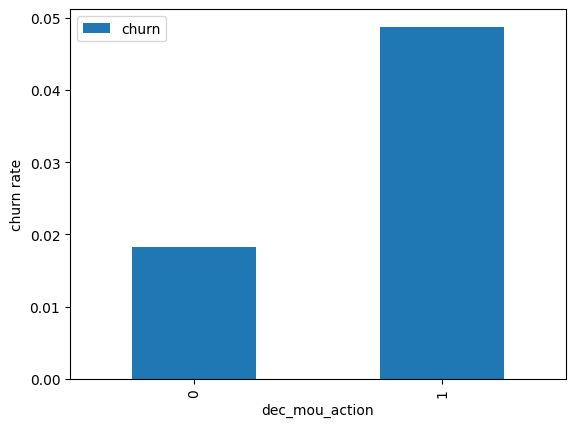

In [281]:
## Plot a graph to show the churn rate on basis whether the customer decreased her / his minutes of usage in the action month
df_data.pivot_table(values='churn', index='dec_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

This shows that churn rates is more for customers whose MOU has decreased from good to action phase

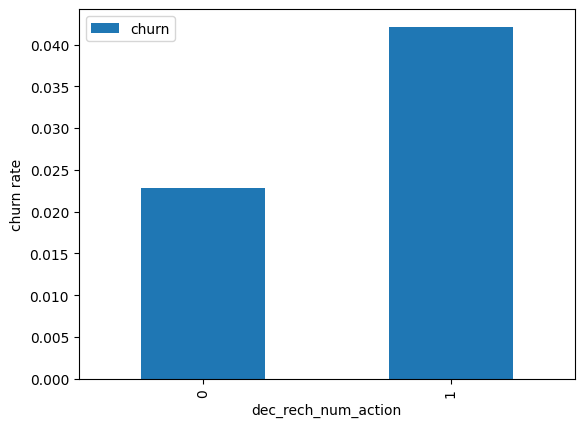

In [282]:
## Plot a graph to show the churn rate on basis whether the customer decreased her / his recharges in the action month
df_data.pivot_table(values='churn', index='dec_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

This shows that churn rates is more for customers whose amount of recharge has decreased from good to action phase

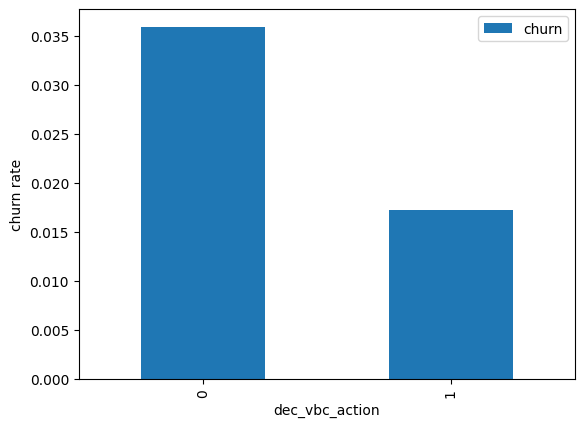

In [283]:
## this will plot graph based on basis of whether customer decreased his/her volume based cost in action month
df_data.pivot_table(values='churn', index='dec_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here ,Customers whose volume-based cost in action month is higher have higher churn rates. This indicates that even when they are in the action phase, customers do not increase their monthly recharge.

In [284]:
## Analyse the average revenue per customer whether they will churn or not in action phase

In [285]:
## 
df_data_churn = df_data[df_data['churn'] == 1]
df_data_nchurn = df_data[df_data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

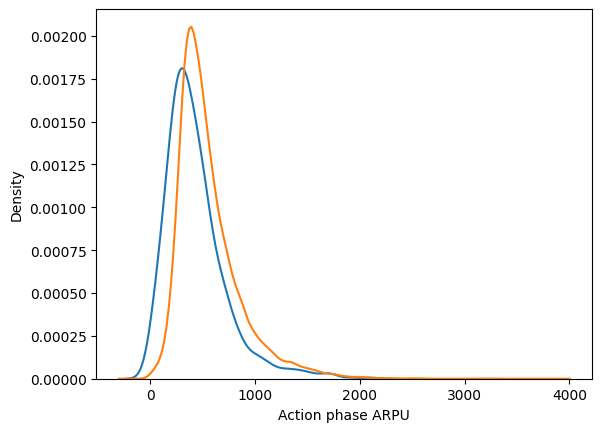

In [286]:
# Distribution plot
ax = sns.distplot(df_data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(df_data_nchurn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

The range of average revenue per user (ARPU) for churned customers is primarily 0 to 900. Customers with higher ARPU are less likely to leave the company.

The range of ARPU for non-churned clients is primarily 0 to 1000.


[Text(0.5, 0, 'Action phase MOU')]

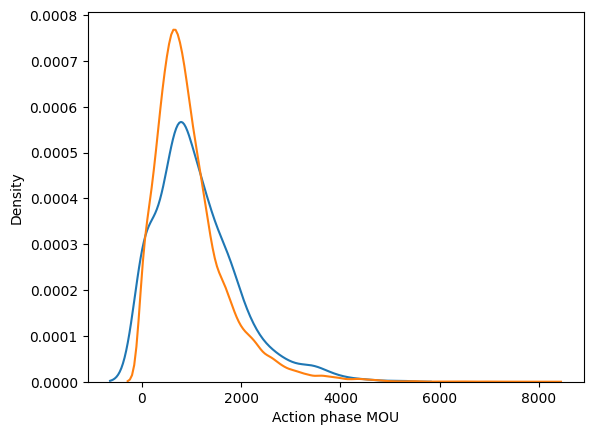

In [287]:
## Analyse the MOU per customer whether they will churn or not in action phase
# Distribution plot
ax = sns.distplot(df_data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(df_data_nchurn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

The churn clients' minutes of usage (MOU) are primarily in the 0 to 2500 range. Less turnover is likely the stronger the MOU.


In [288]:
## Bivariate Analysis

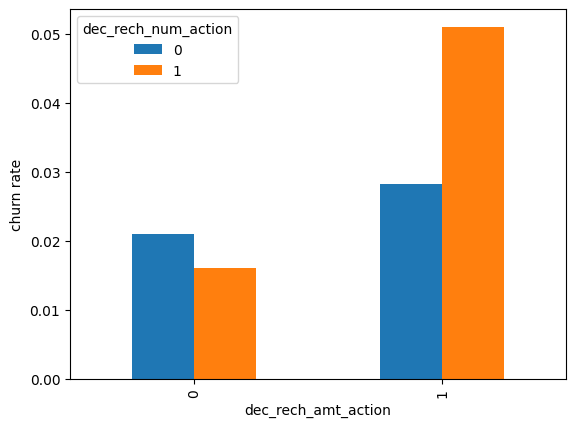

In [289]:
## Analysis of the churn rate using the action phase's decreasing recharge amount and recharge frequency
df_data.pivot_table(values='churn', index='dec_rech_amt_action', columns='dec_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

The accompanying plot  demonstrates that consumers with lower recharge amounts and/or fewer recharges in the action phase compared to the good phase have higher churn rates.

In [290]:
#Analysis of the action phase's churn rate based on volume-based costs and declining recharge amounts

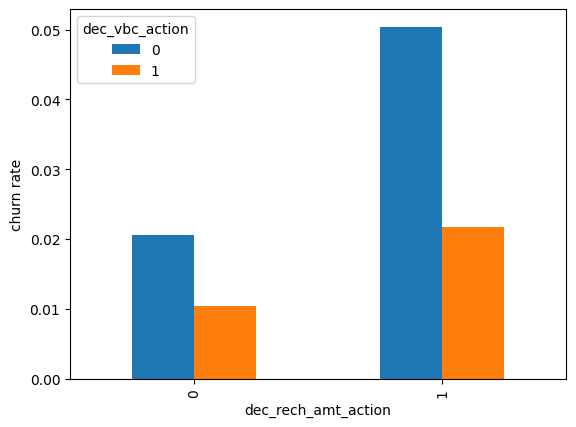

In [291]:
df_data.pivot_table(values='churn', index='dec_rech_amt_action', columns='dec_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can see that the churn rate is higher in this instance as well for consumers whose recharge amounts are reduced as the volume-based costs rise during the action month.

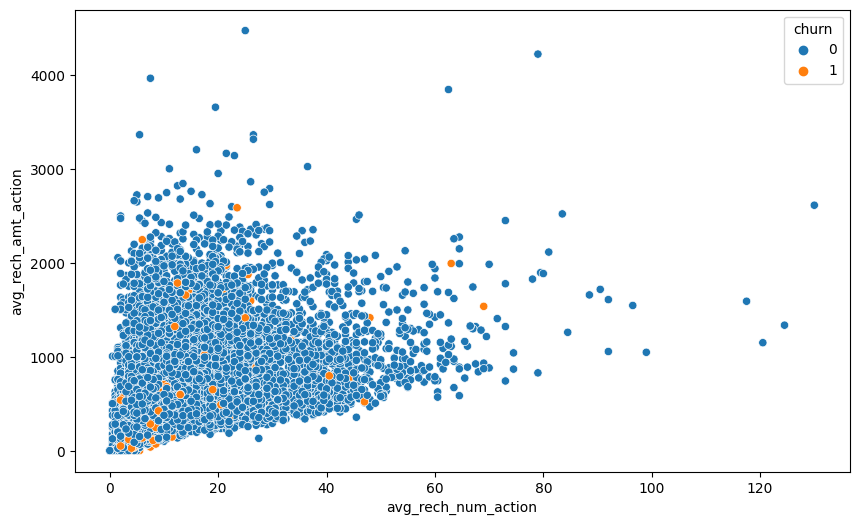

In [292]:
#Analysis of the recharge amount and recharge rate in the current month
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data = df_data ,x = 'avg_rech_num_action',y='avg_rech_amt_action', hue='churn')

In [293]:
## drop the columns
df_data = df_data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','total_rech_num_6','avg_rech_num_action','diff_rech_num','total_rech_num_7','total_rech_num_8','avg_mou_action'], axis=1)

The pattern mentioned above demonstrates that the recharge quantity and amount are primarily propotional. The amount of the recharge increases with the number of recharges.

In [294]:
## Train-Test Split of data

In [295]:
from sklearn.model_selection import train_test_split

In [296]:
# Putting feature variables into X
X = df_data.drop(['mobile_number','churn'], axis=1)

In [297]:
# Putting target variable to y
Y = df_data['churn']

In [298]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

Dealing with data imbalance
We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [299]:

from imblearn.over_sampling import SMOTE

In [300]:
sm = SMOTE(random_state=27)

In [301]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

In [302]:
## Feature Scaling

In [303]:
from sklearn.preprocessing import StandardScaler

In [304]:
scaler = StandardScaler()

In [305]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()

In [306]:
print(cols_scale)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'to

In [307]:
# Removing the derived binary columns 
cols_scale.remove('dec_mou_action')
cols_scale.remove('dec_rech_num_action')
cols_scale.remove('dec_rech_amt_action')
cols_scale.remove('dec_arpu_action')
cols_scale.remove('dec_vbc_action')

In [308]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [309]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_6_and_7,dec_mou_action,dec_rech_num_action,dec_rech_amt_action,dec_arpu_action,dec_vbc_action
0,0.0,0.0,0.0,0.138131,-0.524290,-0.277238,0.107050,-0.662115,-0.465694,-0.212115,-0.636007,0.316604,-0.254877,-0.001268,-0.235897,-0.299919,-0.376483,-0.414494,-0.263285,-0.311946,-0.251550,0.484684,-0.191311,-0.399356,-0.257176,-0.268233,-0.245192,-0.192048,-0.268757,-0.245087,0.128537,-0.336216,-0.418969,0.255561,-0.528487,-0.337580,-0.342543,-0.503812,0.649996,-0.144889,-0.14045,-0.119425,0.0,0.0,0.0,-0.048265,-0.731082,0.214403,-0.080736,-0.092210,-0.061548,-0.349248,-0.364598,-0.018022,-0.347185,-0.015583,-0.013735,-0.000837,-0.860271,-0.011322,-0.204522,-0.267108,-0.242913,-0.380923,-0.273146,-0.437669,-0.290239,-0.270859,-0.150113,-0.409509,-0.364486,-0.440555,-0.175805,-0.159882,0.078720,-0.165077,0.366833,-0.117348,-0.136297,-0.137653,-0.110633,0.0,0.0,0.0,-0.235874,0.120655,-0.064067,-0.476538,-0.287797,-0.420934,-0.366976,-0.089565,-0.191817,-0.152602,-0.154478,-0.126705,-0.099701,-0.120566,-0.081523,0.041730,-0.726666,-0.236244,0.053899,0.023108,0.029559,0.601937,-0.810942,-0.627014,-0.094599,0.700387,1.751483,0.513596,1.201853,-0.241485,3.235900,3.107186,-0.232664,4.034919,2.354801,2.446935,-0.225005,-0.221607,-0.216069,-0.14124,-0.137326,-0.114084,-0.361373,-0.236073,-0.265248,0.110852,-0.102463,-0.426879,1,1,1,1,1
1,0.0,0.0,0.0,-1.426746,4.416184,3.251460,-0.658560,-0.237097,-0.004381,-0.775374,2.521550,2.729993,-0.254877,-0.253588,-0.304986,-0.299919,-0.376483,-0.432716,-0.201384,0.270388,0.198131,-0.529912,1.105708,0.288749,-0.276593,-0.268233,-0.245192,-0.192048,-0.268757,-0.245087,-0.477399,0.843065,0.290279,-0.570520,-0.320382,-0.040852,-0.512435,2.293275,3.084825,-0.144889,-0.14045,-0.119425,0.0,0.0,0.0,-0.771810,1.366684,2.063561,-0.080736,-0.092210,-0.061548,-0.349248,-0.364598,-0.291120,-0.347185,-0.015583,-0.013735,-0.970474,1.667923,1.938188,-0.411197,0.192729,0.156396,-0.482036,0.744086,0.256470,-0.290239,-0.270859,-0.257736,-0.583653,0.569603,0.219310,-0.216133,-0.200508,-0.112713,-0.355794,0.100210,-0.034672,-0.136297,-0.137653,-0.110633

In [310]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_6_and_7,dec_mou_action,dec_rech_num_action,dec_rech_amt_action,dec_arpu_action,dec_vbc_action
5704,0.0,0.0,0.0,0.241456,-0.270861,1.004264,-0.725406,-0.690221,-0.476551,0.480644,0.306860,2.321845,-0.077705,-0.253588,-0.304986,0.213075,-0.376483,-0.432716,-0.278191,-0.283021,-0.106921,0.027398,0.005638,0.033949,-0.088060,-0.268233,-0.245192,0.034518,-0.268757,-0.245087,-0.161727,-0.196031,-0.055334,-0.610746,-0.570321,-0.419760,0.345751,0.369708,2.699760,-0.144889,-0.14045,-0.119425,0.0,0.0,0.0,-0.214895,-0.152326,1.550211,-0.080736,-0.09221,-0.061548,1.046265,0.769149,0.756843,0.310927,-0.015583,-0.013735,-0.254730,-0.210332,1.353635,-0.357437,-0.095430,0.281705,0.088755,-0.113241,0.515844,-0.290239,-0.270859,-0.194304,-0.156592,-0.166946,0.468092,-0.216133,-0.200508,-0.187251,0.112506,-0.185667,-0.166229,-0.136297,-0.137653,-0.110633,0.0,0.0,0.0,-0.079083,-0.265903,-0.233520,-0.195259,-0.205268,0.286118,-0.366976,-0.089565,-0.191817,-0.152602,0.283915,-0.126705,-0.099701,-0.120566,-0.081523,0.085036,-0.238463,0.816184,0.053899,-0.174502,0.029559,0.175714,0.368489,-0.352063,3.322563,2.186970,-0.098368,-0.263171,-0.064325,0.507365,3.235900,-0.251023,-0.232664,0.459239,2.354801,2.446935,-0.225005,-0.221607,-0.216069,1.303180,1.208915,2.526212,0.224936,0.018315,0.195420,-0.259107,0.505441,-0.097160,0,0,1,1,0
64892,0.0,0.0,0.0,0.045897,-0.780569,-0.158981,-0.734193,-0.698062,-0.502135,-0.359047,-0.577361,-0.256315,0.022719,-0.253588,-0.304986,-0.120547,-0.376483,-0.432716,-0.278354,-0.302987,-0.174723,-0.300734,-0.204662,-0.296059,-0.262187,-0.268233,-0.245192,-0.192048,-0.268757,-0.245087,-0.379467,-0.338623,-0.306884,-0.619889,-0.570321,-0.415470,-0.232147,-0.436756,-0.040629,-0.144889,-0.14045,-0.104453,0.0,0.0,0.0,-0.616571,-0.714263,-0.305682,-0.080736,-0.09221,-0.061548,-0.328925,-0.364598,-0.291120,-0.347185,-0.015583,-0.013735,-0.776088,-0.845187,-0.422218,-0.108535,-0.347989,-0.187586,0.377449,0.198973,0.240816,-0.275575,-0.257478,-0.235189,0.172257,-0.079257,0.045788,-0.216133,-0.152084,0.151040,2.983510,2.166595,2.203982,0.945088,2.853015,1.082460,0.0,

In [311]:
## Logistic regression 

In [312]:
import statsmodels.api as smp

In [313]:
# build the model
# Adding the constant to X_train
log_ch = smp.GLM(y_train,(smp.add_constant(X_train)), family=smp.families.Binomial())

In [314]:
# Fit the model
log_ch = log_ch.fit().summary()

In [315]:
log_ch

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42721
Model Family:                Binomial   Df Model:                          128
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Jun 2023   Deviance:                       4111.2
Time:                        17:32:19   Pearson chi2:                 2.22e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     4438.3293   2.05e+05      0.022      0.983   -3.98e+05    4.06e+05
loc_og_t2o_mou              -0.0007      0.032     -0.022      0.983      -0.064       0.063
std_og_t2o_mou              -0.0017      0.077     -0.022      0.983      -0.153       0.149
loc_ic_t2o_mou              -0.0033      0.152     -0.022      0.983      -0.301       0.294
arpu_6                      -0.1755      0.160     -1.098      0.272      -0.489       0.138
arpu_7                       0.0772      0.166      0.464      0.643      -0.249       0.403
arpu_8                      -0.0418      0.231     -0.181      0.856      -0.494       0.411
onnet_mou_6                  6.6773      7.400      0.902      0.367      -7.827      21.181
onnet_mou_7                  2.8859      4.126      0.699      0.484      -5.202      10.974
onnet_mou_8                 -3.1144      4.089     -0.762      0.446     -11.128       4.899
offnet_mou_6                 6.7046      6.975      0.961      0.336      -6.966      20.376
offnet_mou_7                 3.4435      3.957      0.870      0.384      -4.312      11.199
offnet_mou_8                -4.0831      4.267     -0.957      0.339     -12.446       4.279
roam_ic_mou_6                0.1011      0.058      1.739      0.082      -0.013       0.215
roam_ic_mou_7               -0.0431      0.071     -0.611      0.542      -0.181       0.095
roam_ic_mou_8                0.0541      0.054      0.992      0.321      -0.053       0.161
roam_og_mou_6               -2.0645      2.359     -0.875      0.381      -6.687       2.558
roam_og_mou_7               -0.7240      1.074     -0.674      0.500      -2.829       1.381
roam_og_mou_8                1.0625      1.196      0.888      0.374      -1.282       3.407
loc_og_t2t_mou_6         -2268.9981   1501.604     -1.511      0.131   -5212.088     674.092
loc_og_t2t_mou_7          -581.7675   1578.989     -0.368      0.713   -3676.528    2512.993
loc_og_t2t_mou_8          3508.1898   1652.206      2.123      0.034     269.925    6746.454
loc_og_t2m_mou_6         -2297.3177   1520.042     -1.511      0.131   -5276.545     681.910
loc_og_t2m_mou_7          -549.2005   1489.475     -0.369      0.712   -3468.519    2370.118
loc_og_t2m_mou_8          3743.0968   1762.745      2.123      0.034     288.181    7198.013
loc_og_t2f_mou_6          -196.3499    129.960     -1.511      0.131    -451.067      58.367
loc_og_t2f_mou_7           -48.7509    132.054     -0.369      0.712    -307.573     210.071
loc_og_t2f_mou_8           310.0456    146.165      2.121      0.034      23.567     596.524
loc_og_t2c_mou_6             0.0238      0.053      0.450      0.652      -0.080       0.128
loc_og_t2c_mou_7             0.0214      0.041      0.525      0.600      -0.059       0.101
loc_og_t2c_mou

In [316]:
## Feature Selection Using RFE

In [317]:
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
log_reg = LogisticRegression()

In [318]:
# RFE with 15 columns
from sklearn.feature_selection import RFE

In [319]:
rfe = RFE(log_reg,n_features_to_select=15)

In [320]:
# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [321]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['onnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8',
       'isd_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'ic_others_8', 'monthly_2g_8',
       'monthly_3g_8', 'sep_vbc_3g', 'dec_vbc_action'],
      dtype='object')


In [322]:
## First model with RFE selected columns

In [323]:
# Adding constant to X_train
X_train_sm_one = smp.add_constant(X_train[rfe_cols])

In [324]:
#Instantiate the model
log_ch_one = smp.GLM(y_train, X_train_sm_one, family=smp.families.Binomial())

In [325]:
# Fit the model
log_ch_one = log_ch_one.fit()

log_ch_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Jun 2023   Deviance:                       31099.
Time:                        17:34:59   Pearson chi2:                 3.30e+06
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -53.9660   4236.610     -0.013      0.990   -8357.570    8249.638
onnet_mou_8          1.9710      0.142     13.847      0.000       1.692       2.250
roam_og_mou_8        0.5211      0.028     18.284      0.000       0.465       0.577
std_og_t2m_mou_8     1.9375      0.134     14.458      0.000       1.675       2.200
std_og_mou_8         1.1455      0.129      8.880      0.000       0.893       1.398
isd_og_mou_8        -1.0683      0.203     -5.254      0.000      -1.467      -0.670
og_others_8      -3845.1363   3.08e+05     -0.012      0.990   -6.08e+05    6.01e+05
total_og_mou_8      -4.6822      0.160    -29.278      0.000      -4.996      -4.369
loc_ic_t2m_mou_8    -0.8106      0.081     -9.999      0.000      -0.970      -0.652
loc_ic_t2f_mou_8    -0.8190      0.069    -11.878      0.000      -0.954      -0.684
total_ic_mou_8      -1.1082      0.067    -16.601      0.000      -1.239      -0.977
ic_others_8         -1.2658      0.123    -10.297      0.000      -1.507      -1.025
monthly_2g_8        -0.9213      0.044    -21.092      0.000      -1.007      -0.836
monthly_3g_8        -1.0787      0.046    -23.295      0.000      -1.169      -0.988
sep_vbc_3g          -1.0734      0.093    -11.538      0.000      -1.256      -0.891
dec_vbc_action      -1.3143      0.073    -17.957      0.000      -1.458      -1.171
====================================================================================
"""

In [326]:
## Checking VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [327]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_og_mou_8,15.36
2,std_og_t2m_mou_8,14.12
0,onnet_mou_8,13.50
3,std_og_mou_8,12.57
9,total_ic_mou_8,3.26
7,loc_ic_t2m_mou_8,3.24
1,roam_og_mou_8,1.26
8,loc_ic_t2f_mou_8,1.18
14,dec_vbc_action,1.08
12,monthly_3g_8,1.07


In [328]:
## Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99

In [329]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['onnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'ic_others_8', 'monthly_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'dec_vbc_action']


In [330]:
## Model second : Building the model after removing og_others_8 variable.

In [331]:
# Adding constant to X_train
X_train_sm_second = smp.add_constant(X_train[log_cols])

#Instantiate the model
log_ch_second = smp.GLM(y_train, X_train_sm_second, family=smp.families.Binomial())

# Fit the model
log_ch_second = log_ch_second.fit()

log_ch_second.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15589.
Date:                Mon, 05 Jun 2023   Deviance:                       31177.
Time:                        17:35:01   Pearson chi2:                 3.29e+06
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4825
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.1663      0.030    -39.004      0.000      -1.225      -1.108
onnet_mou_8          1.9805      0.142     13.909      0.000       1.701       2.260
roam_og_mou_8        0.5196      0.028     18.303      0.000       0.464       0.575
std_og_t2m_mou_8     1.9455      0.134     14.514      0.000       1.683       2.208
std_og_mou_8         1.1482      0.129      8.886      0.000       0.895       1.401
isd_og_mou_8        -1.1672      0.211     -5.536      0.000      -1.580      -0.754
total_og_mou_8      -4.6998      0.160    -29.397      0.000      -5.013      -4.386
loc_ic_t2m_mou_8    -0.8040      0.081     -9.923      0.000      -0.963      -0.645
loc_ic_t2f_mou_8    -0.8194      0.069    -11.880      0.000      -0.955      -0.684
total_ic_mou_8      -1.1110      0.067    -16.624      0.000      -1.242      -0.980
ic_others_8         -1.2652      0.123    -10.293      0.000      -1.506      -1.024
monthly_2g_8        -0.9255      0.044    -21.084      0.000      -1.012      -0.839
monthly_3g_8        -1.0766      0.046    -23.267      0.000      -1.167      -0.986
sep_vbc_3g          -1.0710      0.093    -11.515      0.000      -1.253      -0.889
dec_vbc_action      -1.3150      0.073    -17.982      0.000      -1.458      -1.172
====================================================================================
"""

In [332]:
## checking VIF model 2
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_og_mou_8,15.34
2,std_og_t2m_mou_8,14.12
0,onnet_mou_8,13.49
3,std_og_mou_8,12.57
8,total_ic_mou_8,3.26
6,loc_ic_t2m_mou_8,3.24
1,roam_og_mou_8,1.26
7,loc_ic_t2f_mou_8,1.18
13,dec_vbc_action,1.08
11,monthly_3g_8,1.07


As we can see from the model summary that all the variables p-values are significant and total_og_mou_8 column has the highest VIF 15.34. Hence, deleting total_og_mou_8 column.

In [333]:
# Removing offnet_mou_8 column
log_cols.remove('total_og_mou_8')

In [334]:
## Model- third
# Model after removing total_og_mou_8 column.

In [335]:
# Adding constant to X_train
X_train_sm_third = smp.add_constant(X_train[log_cols])

#Instantiate the model
log_ch_third = smp.GLM(y_train, X_train_sm_third, family=smp.families.Binomial())

# Fit the model
log_ch_third = log_ch_third.fit()

log_ch_third.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42836
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16196.
Date:                Mon, 05 Jun 2023   Deviance:                       32393.
Time:                        17:35:02   Pearson chi2:                 7.96e+07
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4676
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2137      0.030    -39.991      0.000      -1.273      -1.154
onnet_mou_8         -1.2711      0.094    -13.524      0.000      -1.455      -1.087
roam_og_mou_8        0.8901      0.028     31.741      0.000       0.835       0.945
std_og_t2m_mou_8    -1.1028      0.089    -12.411      0.000      -1.277      -0.929
std_og_mou_8         1.4765      0.129     11.455      0.000       1.224       1.729
isd_og_mou_8        -1.4096      0.221     -6.364      0.000      -1.844      -0.976
loc_ic_t2m_mou_8    -2.0682      0.076    -27.040      0.000      -2.218      -1.918
loc_ic_t2f_mou_8    -0.8815      0.070    -12.531      0.000      -1.019      -0.744
total_ic_mou_8      -1.1817      0.068    -17.356      0.000      -1.315      -1.048
ic_others_8         -1.3331      0.123    -10.817      0.000      -1.575      -1.092
monthly_2g_8        -0.9482      0.045    -21.029      0.000      -1.037      -0.860
monthly_3g_8        -1.1676      0.051    -22.758      0.000      -1.268      -1.067
sep_vbc_3g          -1.0261      0.088    -11.719      0.000      -1.198      -0.855
dec_vbc_action      -1.2922      0.072    -17.872      0.000      -1.434      -1.151
====================================================================================
"""

VIF for third model

In [336]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,std_og_mou_8,12.40
2,std_og_t2m_mou_8,7.01
0,onnet_mou_8,5.54
7,total_ic_mou_8,3.25
5,loc_ic_t2m_mou_8,2.87
6,loc_ic_t2f_mou_8,1.17
1,roam_og_mou_8,1.10
12,dec_vbc_action,1.08
10,monthly_3g_8,1.07
9,monthly_2g_8,1.05


In [337]:
## As we can see from the model summary that all the variables p-values are significant and std_og_mou_8 column has the highest VIF 12.40. Hence, deleting std_og_mou_8 column.
# Removing offnet_mou_8 column
log_cols.remove('std_og_mou_8')

In [338]:
## Model- fourth
# Model after removing std_og_mou_8 column.
# Adding constant to X_train
X_train_sm_fourth = smp.add_constant(X_train[log_cols])

#Instantiate the model
log_ch_fourth = smp.GLM(y_train, X_train_sm_fourth, family=smp.families.Binomial())

# Fit the model
log_ch_fourth = log_ch_fourth.fit()

log_ch_fourth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42837
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16290.
Date:                Mon, 05 Jun 2023   Deviance:                       32580.
Time:                        17:35:03   Pearson chi2:                 1.31e+07
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4653
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.1936      0.030    -39.946      0.000      -1.252      -1.135
onnet_mou_8         -0.2230      0.014    -16.035      0.000      -0.250      -0.196
roam_og_mou_8        0.7606      0.025     30.269      0.000       0.711       0.810
std_og_t2m_mou_8    -0.0943      0.013     -7.207      0.000      -0.120      -0.069
isd_og_mou_8        -1.3615      0.215     -6.333      0.000      -1.783      -0.940
loc_ic_t2m_mou_8    -2.1088      0.078    -27.185      0.000      -2.261      -1.957
loc_ic_t2f_mou_8    -0.8999      0.071    -12.714      0.000      -1.039      -0.761
total_ic_mou_8      -1.3188      0.069    -19.179      0.000      -1.454      -1.184
ic_others_8         -1.3021      0.122    -10.654      0.000      -1.542      -1.063
monthly_2g_8        -0.9413      0.044    -21.181      0.000      -1.028      -0.854
monthly_3g_8        -1.1365      0.049    -23.056      0.000      -1.233      -1.040
sep_vbc_3g          -1.0425      0.088    -11.826      0.000      -1.215      -0.870
dec_vbc_action      -1.2963      0.072    -18.001      0.000      -1.437      -1.155
====================================================================================
"""

In [339]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_ic_mou_8,3.18
4,loc_ic_t2m_mou_8,2.87
5,loc_ic_t2f_mou_8,1.17
11,dec_vbc_action,1.08
9,monthly_3g_8,1.07
8,monthly_2g_8,1.05
0,onnet_mou_8,1.04
1,roam_og_mou_8,1.04
2,std_og_t2m_mou_8,1.03
7,ic_others_8,1.03


We can see that all of the variables are significant at this point and that there is no multicollinearity among the variables from the model summary and the VIF list.

Hence fourth model can be the final model.

In [340]:
## Model performance on the train set

In [341]:
# Getting the predicted value on the train set
y_train_pred = log_ch_fourth.predict(X_train_sm_fourth)
y_train_pred.head()

0    4.041620e-01
1    1.785777e-01
2    6.220953e-02
3    4.813745e-03
4    2.556144e-17
dtype: float64

In [342]:
#Creating a dataframe with the actual churn and the predicted probabilities
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,4.041620e-01,0
1,0,1.785777e-01,1
2,0,6.220953e-02,2
3,0,4.813745e-03,3
4,0,2.556144e-17,4


In [343]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,4.041620e-01,0,1,1,1,1,1,0,0,0,0,0
1,0,1.785777e-01,1,1,1,0,0,0,0,0,0,0,0
2,0,6.220953e-02,2,1,0,0,0,0,0,0,0,0,0
3,0,4.813745e-03,3,1,0,0,0,0,0,0,0,0,0
4,0,2.556144e-17,4,1,0,0,0,0,0,0,0,0,0


In [344]:
#Finding Optimal Probablity Cutoff Point
from sklearn.metrics import confusion_matrix
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm_one = confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm_one))
    accuracy = (cm_one[0,0]+cm_one[1,1])/total1
    
    speci = cm_one[0,0]/(cm_one[0,0]+cm_one[0,1])
    sensi = cm_one[1,1]/(cm_one[1,0]+cm_one[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.747071     0.981330     0.512812
0.2          0.2  0.779533     0.964807     0.594259
0.3          0.3  0.802310     0.946744     0.657876
0.4          0.4  0.821937     0.927468     0.716406
0.5          0.5  0.837293     0.900630     0.773956
0.6          0.6  0.845484     0.852789     0.838180
0.7          0.7  0.835683     0.768495     0.902870
0.8          0.8  0.789825     0.622170     0.957480
0.9          0.9  0.574166     0.161354     0.986978


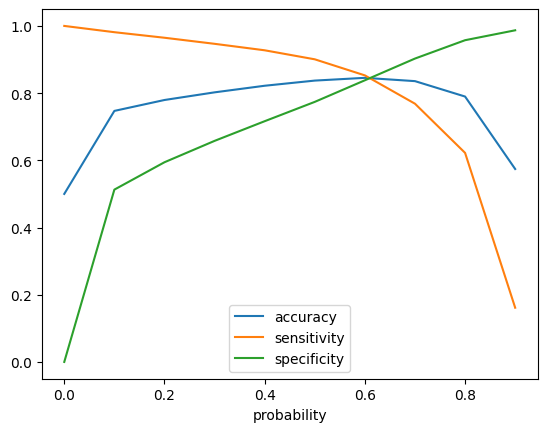

In [345]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Accuracy: Around 0.6, it stabilises.

Sensitivity - Declines as probability rises.

As probability rises, specificity rises as well.

We can observe that there is an accurate balance between sensitivity and specificity at point 0.6 where the three parameters cross each other.


Here, sensitivity is more important than accuracy and specificity to us. Although the ideal probability cutoff should be 0.6 according to the preceding curve, we are using *0.5* in order to get increased sensitivity, which is our primary objective.

In [346]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,4.041620e-01,0,1,1,1,1,1,0,0,0,0,0,0
1,0,1.785777e-01,1,1,1,0,0,0,0,0,0,0,0,0
2,0,6.220953e-02,2,1,0,0,0,0,0,0,0,0,0,0
3,0,4.813745e-03,3,1,0,0,0,0,0,0,0,0,0,0
4,0,2.556144e-17,4,1,0,0,0,0,0,0,0,0,0,0


In [347]:
# Confusion metrics
confusion = confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[16582  4843]
 [ 2129 19296]]


In [348]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [349]:
from sklearn.metrics import accuracy_score
# Accuracy
print("Accuracy:-",accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8372928821470245
Sensitivity:- 0.900630105017503
Specificity:- 0.7739556592765461


On the train set prediction, we have good accuracy, sensitivity, and specificity.


In [350]:
## Plotting the ROC Curve (Trade off between sensitivity & specificity)
# ROC Curve function
from sklearn import metrics

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

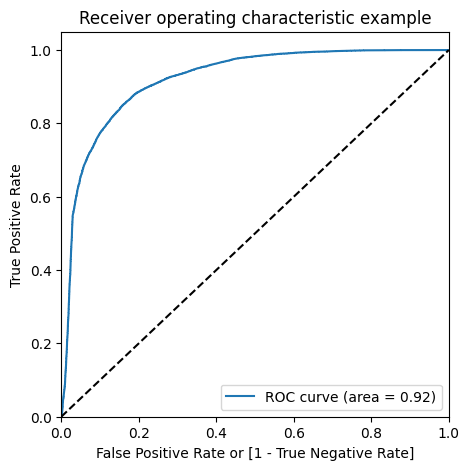

In [351]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

In [352]:
# We can observe that the ROC curve's area is closer to 1 than it is to the model's Gini coefficient.


In [353]:
# Testing the model on the test set
X_test_log = X_test.copy()

In [354]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [355]:
# Adding constant on the test set
X_test_sm = smp.add_constant(X_test_log)

In [356]:
# Predict on the test set
y_test_pred = log_ch_fourth.predict(X_test_sm)

In [357]:
y_test_pred.head()

5704     0.055531
64892    0.000742
39613    0.385996
93118    0.048559
81235    0.007561
dtype: float64

In [358]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.055531
64892,0.000742
39613,0.385996
93118,0.048559
81235,0.007561


In [359]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [360]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [361]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [362]:

# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [363]:
y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.055531
1,0,64892,0.000742
2,0,39613,0.385996
3,0,93118,0.048559
4,0,81235,0.007561


In [364]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [365]:

# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['CustID','churn','churn_prob'], axis=1)

In [366]:
y_test_pred_final.head()

,CustID,churn,churn_prob
0,5704,0,0.055531
1,64892,0,0.000742
2,39613,0,0.385996
3,93118,0,0.048559
4,81235,0,0.007561


In [367]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [368]:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,5704,0,0.055531,0
1,64892,0,0.000742,0
2,39613,0,0.385996,0
3,93118,0,0.048559,0
4,81235,0,0.007561,0


In [369]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4123 1225]
 [  35  158]]


In [370]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [371]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7726042230644288
Sensitivity:- 0.8186528497409327
Specificity:- 0.7709424083769634


Model Summary:

Train set:
Accuracy:- 0.8372928821470245
Sensitivity:- 0.900630105017503
Specificity:- 0.7739556592765461

Test Set:
Accuracy:- 0.7726042230644288
Sensitivity:- 0.8186528497409327
Specificity:- 0.7709424083769634

Overall, the model is applying what it had learned from the train set well in the test set.


The logistic model without PCA has good sensitivity and accuracy, as can be seen.The model also assists us in determining the variables that should be considered when deciding which clients to lose. As a result, the model is better suited to explaining to the business.
